lol, err: could not convert string to float: '.3979454\x07Connected'
[0.015, 0.016, 0.016, 0.016, 0.015, 0.015, 0.016, 0.015, 0.016, 0.016]


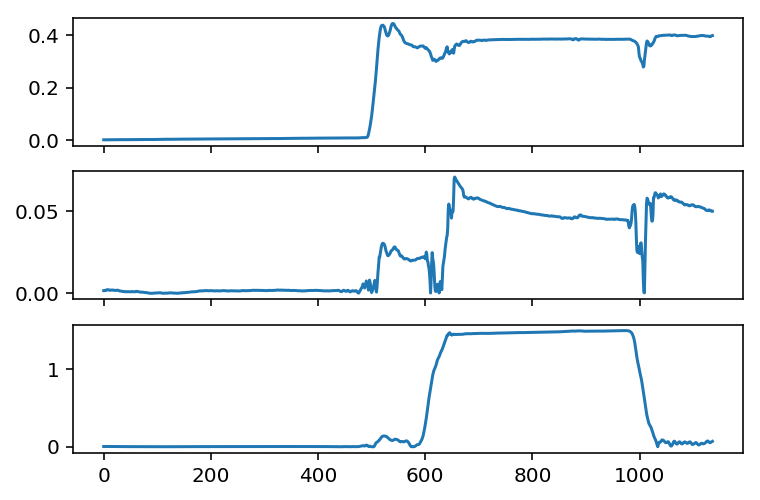

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import re

def match_to_tuple(string):
    parts = string.split(',')
    return (int(parts[0]), int(parts[1]), int(parts[2]))

log = []
freq = None

with open('dcmimu.txt', 'r', encoding='latin-1') as f:
    for line in f:
        if 'Yaw:' not in line:
            continue
        parts = line.split(';')
        cool_parts = [p for p in parts if (('dt:' in p)
                                           or ('Yaw:' in p)
                                           or ('Pitch:' in p)
                                           or ('Roll:' in p))]
        try:
            dt = float(cool_parts[0].split(':')[1].strip())
            yaw = float(cool_parts[1].split(':')[1].strip()[1:-1])
            pitch = float(cool_parts[2].split(':')[1].strip()[1:-1])
            roll = float(cool_parts[3].split(':')[1].strip()[1:-1])
            log.append((dt, yaw, pitch, roll))
        except Exception as e:
            print('lol, err: {}'.format(e))

ts = list(map(lambda x: x[0], log))
yaws = list(map(lambda x: x[1], log))
pitches = list(map(lambda x: x[2], log))
rolls = list(map(lambda x: x[3], log))

f, axarr = plt.subplots(3, sharex=True)

print(ts[0:10])
axarr[0].plot(yaws)
axarr[1].plot(pitches)
axarr[2].plot(rolls)